In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic')

In [2]:
df = df.drop(['sibsp', 'parch', 'adult_male', 'deck'], axis=1)
df

,survived,pclass,sex,age,fare,embarked,class,who,embark_town,alive,alone
0,0,3,male,22.0,7.2500,S,Third,man,Southampton,no,False
1,1,1,female,38.0,71.2833,C,First,woman,Cherbourg,yes,False
2,1,3,female,26.0,7.9250,S,Third,woman,Southampton,yes,True
3,1,1,female,35.0,53.1000,S,First,woman,Southampton,yes,False
4,0,3,male,35.0,8.0500,S,Third,man,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,Southampton,no,True
887,1,1,female,19.0,30.0000,S,First,woman,Southampton,yes,True
888,0,3,female,NaN,23.4500,S,Third,woman,Southampton,no,False
889,1,1,male,26.0,30.0000,C,First,man,Cherbourg,yes,True


In [3]:
df.describe().round(1)

,survived,pclass,age,fare
count,891.0,891.0,714.0,891.0
mean,0.4,2.3,29.7,32.2
std,0.5,0.8,14.5,49.7
min,0.0,1.0,0.4,0.0
25%,0.0,2.0,20.1,7.9
50%,0.0,3.0,28.0,14.5
75%,1.0,3.0,38.0,31.0
max,1.0,3.0,80.0,512.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   fare         891 non-null    float64 
 5   embarked     889 non-null    object  
 6   class        891 non-null    category
 7   who          891 non-null    object  
 8   embark_town  889 non-null    object  
 9   alive        891 non-null    object  
 10  alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(2), object(5)
memory usage: 64.6+ KB


In [5]:
# fazer um gráfico de analise dos 3 pontos de embarque e ver quantos sobreviveram em cada um

In [6]:
# Completando espaços vazios com a idade média

df['age'] = (df['age'].fillna(df['age'].mean())).astype(int)
df

,survived,pclass,sex,age,fare,embarked,class,who,embark_town,alive,alone
0,0,3,male,22,7.2500,S,Third,man,Southampton,no,False
1,1,1,female,38,71.2833,C,First,woman,Cherbourg,yes,False
2,1,3,female,26,7.9250,S,Third,woman,Southampton,yes,True
3,1,1,female,35,53.1000,S,First,woman,Southampton,yes,False
4,0,3,male,35,8.0500,S,Third,man,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,13.0000,S,Second,man,Southampton,no,True
887,1,1,female,19,30.0000,S,First,woman,Southampton,yes,True
888,0,3,female,29,23.4500,S,Third,woman,Southampton,no,False
889,1,1,male,26,30.0000,C,First,man,Cherbourg,yes,True


In [7]:
# Análises simples com pandas

# Taxa de sobrevivência: calcule a média da coluna survived
media_sobreviventes = (df['survived'].mean() * 100).round(1)
print("Taxa de sobrevivência: ",media_sobreviventes, "%")

# Número total de sobreviventes por sexo
agrup_sexo = df.groupby('sex')['survived'].sum()
print(f'sobreviventes Homens: {agrup_sexo['male']}')
print(f'sobreviventes Mulheres: {agrup_sexo['female']}')

# Média de idade dos sobreviventes vs não sobreviventes
sobreviventes = df.groupby('survived')['age'].mean().round(1)
print(f"Média da idade dos sobreviventes: {sobreviventes[1]}")
print(f"Média da idade dos não sobreviventes: {sobreviventes[0]}")

Taxa de sobrevivência:  38.4 %
sobreviventes Homens: 109
sobreviventes Mulheres: 233
Média da idade dos sobreviventes: 28.4
Média da idade dos não sobreviventes: 30.2


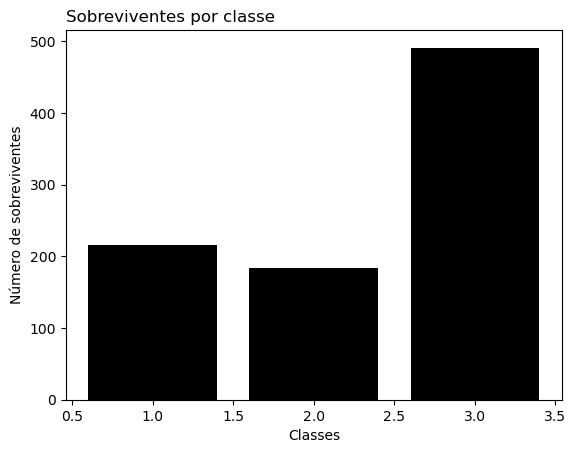

In [8]:
# Gráficos com matplotlib.pyplot

# Barras: número de passageiros por classe (pclass)
passageiros_por_classe = df['pclass'].value_counts()

x = passageiros_por_classe.index
y = passageiros_por_classe.values

plt.bar(x, y, color='k')
plt.title('Sobreviventes por classe', loc='left')
plt.xlabel("Classes")
plt.ylabel("Número de sobreviventes")
plt.show()


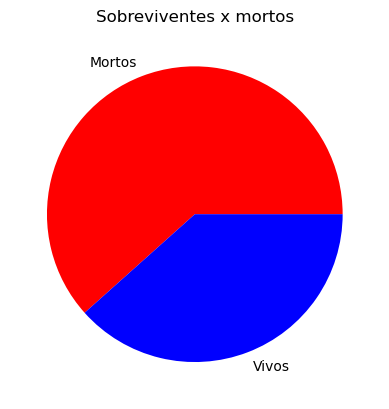

In [20]:
# Pizza: proporção de sobreviventes vs não sobreviventes
sobreviventes_e_nao_sobreviventes = df['survived'].value_counts()

x = sobreviventes_e_nao_sobreviventes.values
nomes = np.array(['Mortos', 'Vivos'])
cores = np.array(['Red', 'Blue'])

plt.pie(x, labels=nomes, colors=cores)
plt.title("Sobreviventes x mortos")
plt.show()


(array([ 50.,  33., 164., 358., 123.,  74.,  50.,  26.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

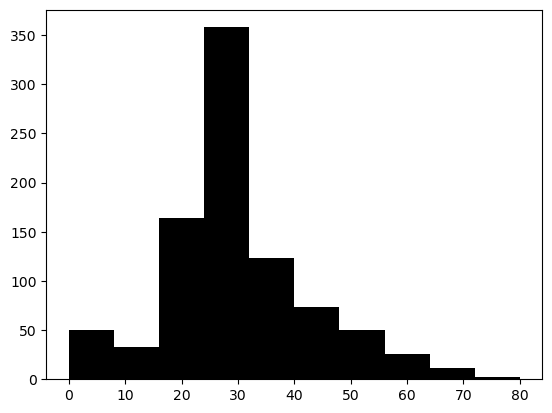

In [28]:
# Histograma: distribuição da idade

idades = df['age']

plt.hist(idades, color='Black') 

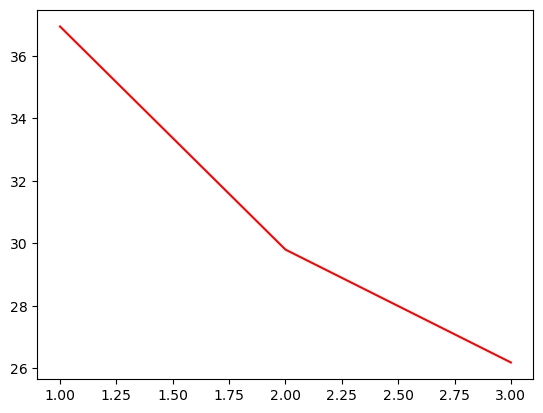

In [29]:
# Linha: média de idade por classe 

idade_classe = df.groupby('pclass')['age'].mean()

idade_media = idade_classe.values
classes = idade_classe.index

plt.plot(classes, idade_media, c='r')
plt.show()